In [2]:
from utils import *

# DECISION TREE

In [13]:
df, train, test, val = get_data(normalize=False, binary_label=True)

In [20]:
from collections import Counter


class DecisionTreeClassifier:

    def __init__(self, max_depth=float('inf')):
        self.max_depth = max_depth
        self.root = None

    def fit(self, x, y):
        assert len(x) == len(y)
        assert len(x) != 0
        self.root = self._create_tree(x, y, None, self.max_depth)

    def _create_tree(self, data, labels, parent, max_depth):
        new_node = Node(None, None, parent)
        if not len(data):
            new_node.label = parent.label  # Use parent label
            return new_node
        most_common_result = Counter(labels).most_common(1)[0][0]
        if len(labels) == 1 or data.shape[1] == 0:  # No more features to split
            new_node.label = most_common_result
            return new_node
        if len(np.unique(labels)) == 1:  # All labels are the same
            new_node.label = labels[0]
            return new_node

        best_feature, best_threshold = self._find_best_split(data, labels)
        new_node = Node(best_feature, best_threshold, parent)

        if max_depth > 0:
            index = data[:, best_feature] <= best_threshold
            data_left = data[index]
            labels_left = labels[index]
            if len(data_left) == 0:
                new_node.label = most_common_result
            new_node.left_child = self._create_tree(data_left, labels_left, new_node, max_depth - 1)

            index = data[:, best_feature] > best_threshold
            data_right = data[index]
            labels_right = labels[index]
            if len(data_right) == 0:
                new_node.label = most_common_result
            new_node.right_child = self._create_tree(data_right, labels_right, new_node, max_depth - 1)

        else:
            new_node.label = most_common_result
            new_node.left_child = None
            new_node.right_child = None

        return new_node

    def _find_best_split(self, data, labels):
        best_gain = 0
        best_feature = None
        best_threshold = None
        for feature in range(data.shape[1]):
            threshold = np.median(data[:, feature])
            gain = self._information_gain(data, labels, feature, threshold)
            if gain >= best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, data, labels, feature, threshold):
        entropy_labels = self._entropy(labels)
        sample_left = labels[data[:, feature] <= threshold]
        sample_right = labels[data[:, feature] > threshold]

        information_gain = entropy_labels - (
                len(sample_left) / len(data) * self._entropy(sample_left) +
                len(sample_right) / len(data) * self._entropy(sample_right)
        )

        return information_gain

    def _entropy(self, labels):
        if len(labels) == 0:
            return 0
        p = sum(labels) / len(labels)
        if p == 0 or p == 1:
            return 0
        return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

    def predict(self, data):
        predictions = []
        for row in data:
            node = self.root
            while node.label is None:
                if row[node.feature] <= node.threshold:
                    node = node.left_child
                else:
                    node = node.right_child
            predictions.append(node.label)

        return predictions


class Node:
    def __init__(self, feature, threshold, parent):
        self.feature = feature
        self.threshold = threshold
        self.parent = parent
        self.label = None
        self.left_child = None
        self.right_child = None


### Sklearn

In [14]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
test_model(clf, train, test, classification=True)

Time taken to train the model:  1.3408911228179932
Binary cross entropy: 15.046600166222445
Accuracy: 0.5825450876529197


0.5825450876529197

Trying hyperparameters: 1
Time taken to train the model:  0.08764791488647461
Binary cross entropy: 14.831142258489006
Accuracy: 0.5885227810184456
Value: 0.5885227810184456
Trying hyperparameters: 2
Time taken to train the model:  0.16405081748962402
Binary cross entropy: 13.512818502178872
Accuracy: 0.6250985338168059
Value: 0.6250985338168059
Trying hyperparameters: 3
Time taken to train the model:  0.24462008476257324
Binary cross entropy: 13.012764663578478
Accuracy: 0.6389720952230805
Value: 0.6389720952230805
Trying hyperparameters: 4
Time taken to train the model:  1.5557754039764404
Binary cross entropy: 13.063906533435334
Accuracy: 0.6375532082610752
Value: 0.6375532082610752
Trying hyperparameters: 5
Time taken to train the model:  0.3780486583709717
Binary cross entropy: 12.882068773944281
Accuracy: 0.6425981396815387
Value: 0.6425981396815387
Trying hyperparameters: 6
Time taken to train the model:  0.44703030586242676
Binary cross entropy: 12.694548584469134
Accuracy: 0.6

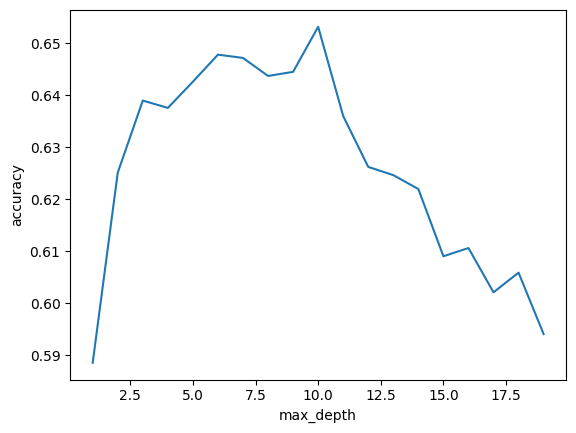

Time taken to train the model:  0.7286891937255859
Binary cross entropy: 12.841886848815228
Accuracy: 0.6437129524530205
Best Accuracy for Decision Tree (sklearn): 0.6437129524530205 with max_depth=10


In [16]:
def get_model(param):
    return tree.DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 20), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'max_depth', 'accuracy')
best_model = get_model(param=best_param)
best_accuracy_DT_sk = test_model(best_model, train, test, classification=True)
print(f"Best Accuracy for Decision Tree (sklearn): {best_accuracy_DT_sk} with max_depth={best_param}")

### From scratch

In [21]:
clf = DecisionTreeClassifier( max_depth=8)
test_model(clf, train, test, classification=True)

Time taken to train the model:  3.411768913269043
Binary cross entropy: 12.846432649469676
Accuracy: 0.6435868331441543


0.6435868331441543

Trying hyperparameters: 1
Time taken to train the model:  0.59755539894104
Binary cross entropy: 16.05854713505361
Accuracy: 0.5544694939303169
Value: 0.5544694939303169
Trying hyperparameters: 2
Time taken to train the model:  0.9142732620239258
Binary cross entropy: 15.285736657216638
Accuracy: 0.5759104524672868
Value: 0.5759104524672868
Trying hyperparameters: 3
Time taken to train the model:  1.125523567199707
Binary cross entropy: 15.012980017980057
Accuracy: 0.583477849597982
Value: 0.583477849597982
Trying hyperparameters: 4
Time taken to train the model:  1.4390547275543213
Binary cross entropy: 14.75158823871167
Accuracy: 0.5907299385148983
Value: 0.5907299385148983
Trying hyperparameters: 5
Time taken to train the model:  1.7859680652618408
Binary cross entropy: 14.581115339188807
Accuracy: 0.5954595617215829
Value: 0.5954595617215829
Trying hyperparameters: 6
Time taken to train the model:  2.1863391399383545
Binary cross entropy: 14.399277579697754
Accuracy: 0.600504493142

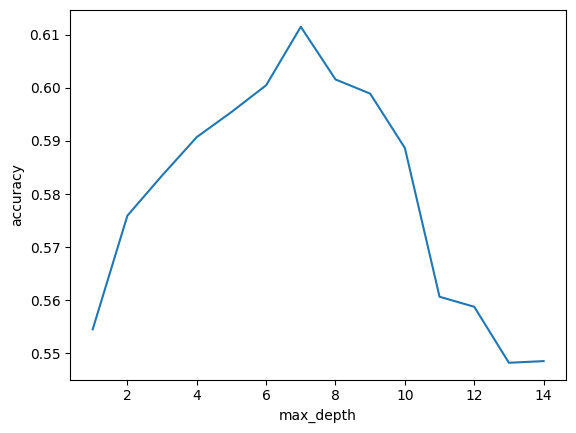

Time taken to train the model:  2.720187187194824
Binary cross entropy: 14.319272061510784
Accuracy: 0.6027241770715096
Best Accuracy for Decision Tree (scratch): 0.6437129524530205 with max_depth=7


In [17]:
def get_model(param):
    return DecisionTreeClassifier(max_depth=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 15), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'max_depth', 'accuracy')
best_model = get_model(param=best_param)
best_accuracy_DT_my = test_model(best_model, train, test, classification=True)
print(f"Best Accuracy for Decision Tree (scratch): {best_accuracy_DT_my} with max_depth={best_param}")
